## 3. Drift Analysis
Simulate drift in batch_2, detect with PSI/KS, plot results.

In [1]:

import os
import sys
project_root = r'c:\Users\anuda\Desktop\cell2cell_churn_drift'
os.chdir(project_root)
sys.path.insert(0, project_root)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.model.drift_detector import detect_drift
from src.config import NUMERIC_FEATURES

baseline_df = pd.read_csv("data/batches/batch_0.csv")
current_df = pd.read_csv("data/batches/batch_2.csv")
print("Baseline & current loaded.")

Baseline & current loaded.


In [2]:
# Sim drift
drifted_df = current_df.copy()
drifted_df['OverageMinutes'] += np.abs(drifted_df['OverageMinutes']) * 0.2
drifted_df.to_csv("data/batches/batch_2_driftsim.csv", index=False)
print("Drift simulated in OverageMinutes.")

# Detect
drifts, has_drift = detect_drift(baseline_df, drifted_df)
print(f"Overall Drift Detected: {has_drift}")

Drift simulated in OverageMinutes.
MonthlyRevenue: PSI=0.104, KS p=0.000, Drift=True
MonthlyMinutes: PSI=0.074, KS p=0.000, Drift=True
TotalRecurringCharge: PSI=0.250, KS p=0.000, Drift=True
DirectorAssistedCalls: PSI=1.098, KS p=0.089, Drift=True
OverageMinutes: PSI=0.040, KS p=0.000, Drift=True
RoamingCalls: PSI=0.026, KS p=0.849, Drift=False
PercChangeMinutes: PSI=3.684, KS p=0.000, Drift=True
PercChangeRevenues: PSI=1.320, KS p=0.000, Drift=True
CustomerCareCalls: PSI=0.129, KS p=0.000, Drift=True
MonthsInService: PSI=8.539, KS p=0.000, Drift=True
HandsetPrice: PSI=1.323, KS p=0.000, Drift=True
DroppedCalls: PSI=0.077, KS p=0.000, Drift=True
Overall Drift Detected: True


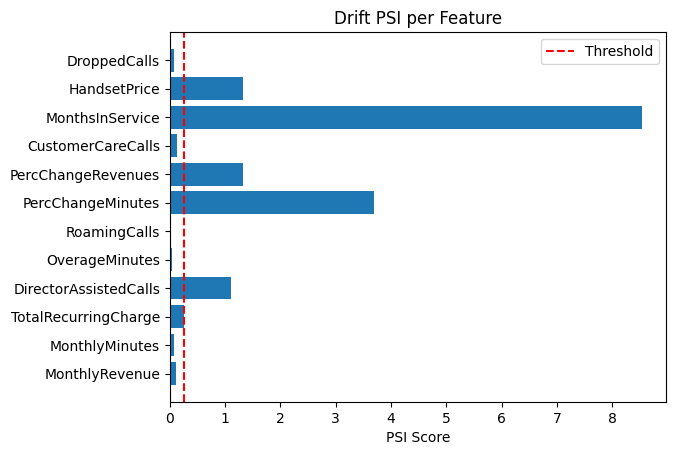

In [3]:
# Bar plot of PSIs
psi_values = [drifts[feat]['psi'] for feat in NUMERIC_FEATURES if feat in drifts]
feat_names = [feat for feat in NUMERIC_FEATURES if feat in drifts]
plt.barh(feat_names, psi_values)
plt.axvline(x=0.25, color='r', linestyle='--', label='Threshold')
plt.xlabel('PSI Score')
plt.title('Drift PSI per Feature')
plt.legend()
plt.show()